In [1]:
#################
# Preprocessing #
#################
# Scores by other composers from the Bach family have been removed beforehand. 
# Miscellaneous scores like mass pieces have also been removed; the assumption here is that
# since different interpretations of the same piece (e.g. Ave Maria, etc) exist, including
# theses pieces might hurt the prediction accuracy, here mostly based on chord progression. 
# (more exactly, a reduced version of the chord progression.)

# In shell, find and copy midi files to target data directory and convert to mxl:
'''
cd {TARGETDIR}
find {MIDIFILEDIR} \( -name "bach*.mid" -o -name "beethoven*.mid" -o -name "scarlatti*.mid" \) -type f -exec cp {} . \;
find . -type f -name "*.mid" -exec /Applications/MuseScore\ 2.app/Contents/MacOS/mscore {} --export-to {}.mxl \;
for f in *.mxl; do mv "$f" "${f%.mid.mxl}.mxl"; done
ls *.mxl > mxl_list.txt
'''

'\ncd {TARGETDIR}\nfind {MIDIFILEDIR} \\( -name "bach*.mid" -o -name "beethoven*.mid" -o -name "scarlatti*.mid" \\) -type f -exec cp {} . \\;\nfind . -type f -name "*.mid" -exec /Applications/MuseScore\\ 2.app/Contents/MacOS/mscore {} --export-to {}.mxl \\;\nfor f in *.mxl; do mv "$f" "${f%.mid.mxl}.mxl"; done\nls *.mxl > mxl_list.txt\n'

In [2]:
#os.system(f'move C:\\Users\\user\\Downloads\\Car.pdf C:\\Users\\user\\Downloads\\Car2.pdf')
for i in range(200):
    #print(i)
    #os.system(f'move C:\\Users\\user\\Downloads\\midi_files\\midi_files\\{i:03d}.mxl C:\\Users\\user\\Downloads\\midi_files\\{i:03d}.mxl')
    pass
    #os.system(f'start "" "C:\\Program Files\\MuseScore 3\\bin\\MuseScore3.exe" C:\\Users\\user\\Downloads\\midi_files\\midi_files\\{i:03d}.midi --export-to C:\\Users\\user\\Downloads\\midi_files\\mxl_files\\{i:03d}.mxl')
#!for /l %i in (0, 1, 199) do move C:\Users\user\Downloads\midi_files\%i.midi C:\Users\user\Downloads\midi_files\midi_files\%i.midi

In [3]:
#!dir "C:/Users/user/Downloads/midi_files/"

In [1]:
from music21 import *
import os
from os import listdir
from os.path import isfile, getsize
from tqdm.notebook import *
import matplotlib.pyplot as plt

In [2]:
# timeout function that lets move on beyond too big files.
# by Thomas Ahle: http://stackoverflow.com/a/22348885
import signal

class timeout:
    def __init__(self, seconds=1, error_message='Timeout'):
        self.seconds = seconds
        self.error_message = error_message
    def handle_timeout(self, signum, frame):
        raise TimeoutError(self.error_message)
    def __enter__(self):
        #signal.signal(signal.SIGALRM, self.handle_timeout)
        pass#signal.alarm(self.seconds)
    def __exit__(self, type, value, traceback):
        pass#signal.alarm(0)

In [3]:
composers = ("Bach", "Mozart", "Beethoven", "Debussy")
print(len(composers))

4


In [14]:
def parse(mxllist, composer):
    import matplotlib.pyplot as plt
    composer_list = [f for f in mxllist if f.replace('-', '_').split('_')[0] == composer]
    mxldir = 'mxl_files/'
    
    sizes = []
    for file in tqdm(composer_list, leave=False):
        break
        file = file.split('_')[1]
        
        size = getsize('midi_files/'+file.strip('.mxl')+'.midi')
        sizes.append(size)
        if (size<=10000): # remove too short scores that may contain no notes
            print(f'warning: file "{file}" too small')
            
        #with timeout(seconds=6000):
        try:
            s = converter.parse(mxldir+file)
            try:
                k = s.flat.keySignature.sharps
            except AttributeError:
                k = s.analyze('key').sharps
            except:
                with open('{}-parsed.txt'.format(composer), 'a') as output_file:            
                    output_file.write('key could not by analyzed\n')
                with open('{}-transposed.txt'.format(composer), 'a') as output_file:            
                    output_file.write('key could not by analyzed\n')
                continue
            t = s.transpose((k*5)%12)
        except:
            print(f'warning: file "{file}" music21 error')
            with open('{}-parsed.txt'.format(composer), 'a') as output_file:
                output_file.write('timeout\n')
            with open('{}-transposed.txt'.format(composer), 'a') as output_file:            
                output_file.write('timeout\n')
            continue

        fp_s = converter.freeze(s, fmt='pickle')
        fp_t = converter.freeze(t, fmt='pickle')

        with open('{}-parsed.txt'.format(composer), 'a') as output_file:
            output_file.write(fp_s+'\n')
        with open('{}-transposed.txt'.format(composer), 'a') as output_file:            
            output_file.write(fp_t+'\n')
    
    plt.boxplot(sizes)

"parse(mxllist, 'bach')\nparse(mxllist, 'beethoven')\nparse(mxllist, 'debussy')\nparse(mxllist, 'scarlatti')\nparse(mxllist, 'victoria')"

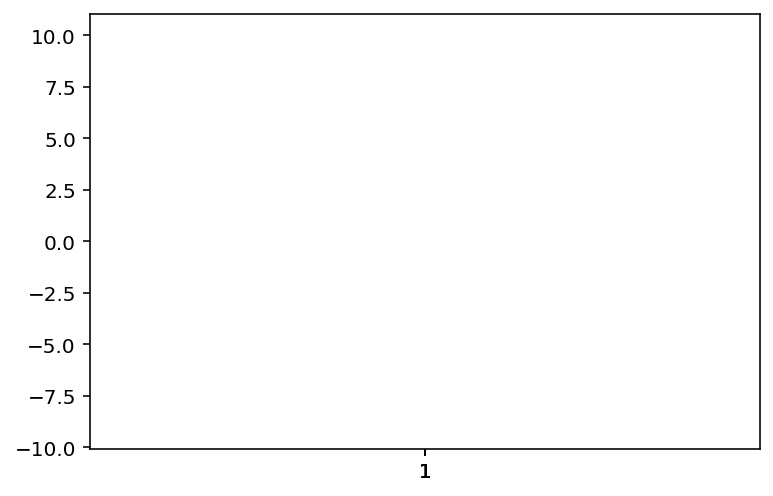

In [15]:
with open('mxl-list.txt', 'r') as f:
    mxllist = [line.strip() for line in f.readlines()]

for composer in tqdm(composers):
    with open(f'{composer}-parsed.txt', 'w') as file: pass
    with open(f'{composer}-transposed.txt', 'w') as file: pass
    parse(mxllist, composer)
'''parse(mxllist, 'bach')
parse(mxllist, 'beethoven')
parse(mxllist, 'debussy')
parse(mxllist, 'scarlatti')
parse(mxllist, 'victoria')'''

In [ ]:
for composer in composers:
    with open(f'{composer}-parsed.txt', 'r')

In [14]:
######################
# Feature Extraction #
######################

In [4]:
import itertools
from collections import Counter

flatten = lambda l: [item for sublist in l for item in sublist] # by Alex Martinelli & Guillaume Jacquenot: http://stackoverflow.com/a/952952
uniqify = lambda seq: list(set(seq))

In [5]:
# Define known chords
major, minor, suspended, augmented, diminished, major_sixth, minor_sixth, dominant_seventh, major_seventh, minor_seventh, half_diminished_seventh, diminished_seventh, major_ninth, dominant_ninth, dominant_minor_ninth, minor_ninth = [0,4,7],[0,3,7],[0,5,7],[0,4,8],[0,3,6],[0,4,7,9],[0,3,7,9],[0,4,7,10],[0,4,7,11],[0,3,7,10],[0,3,6,10],[0,3,6,9],[0,2,4,7,11],[0,2,4,7,10],[0,1,4,7,10],[0,2,3,7,10]
chord_types_list = [major, minor, suspended, augmented, diminished, major_sixth, minor_sixth, dominant_seventh, major_seventh, minor_seventh, half_diminished_seventh, diminished_seventh, major_ninth, dominant_ninth, dominant_minor_ninth, minor_ninth]
chord_types_string = ['major', 'minor', 'suspended', 'augmented', 'diminished', 'major_sixth', 'minor_sixth', 'dominant_seventh', 'major_seventh', 'minor_seventh', 'half_diminished_seventh', 'diminished_seventh', 'major_ninth', 'dominant_ninth', 'dominant_minor_ninth', 'minor_ninth']

roots = list(range(12))
chord_orders = flatten([[{(n+r)%12 for n in v} for v in chord_types_list] for r in roots])
unique_orders = []
for i in range(192):
    if chord_orders[i] not in unique_orders:
        unique_orders.append(chord_orders[i])

In [6]:
def merge_chords(s):
    sf = s.flat
    chords_by_offset = []
    for i in range(int(sf.highestTime)):
        chords_by_offset.append(chord.Chord(sf.getElementsByOffset(i,i+1, includeEndBoundary=False, mustFinishInSpan=False, mustBeginInSpan=False).notes))
    return chords_by_offset

def find_neighbor_note(n, k):
    # find notes k steps away from n
    return (roots[n-6:]+roots[:(n+6)%12])[6+k], (roots[n-6:]+roots[:(n+6)%12])[6-k]

def find_note_distance(n1, n2):
    return abs(6 - (roots[n1-6:]+roots[:(n1+6)%12]).index(n2))

def find_chord_distance(set1, set2):
    d1, d2 = set1.difference(set2), set2.difference(set1)
    if len(d1) < len(d2):
        longer, shorter = d2, list(d1)
    else:
        longer, shorter = d1, list(d2)
    distances = []
    for combination in itertools.combinations(longer, len(shorter)):
        for permutation in itertools.permutations(combination):
            dist_p = abs(len(d1)-len(d2))*3 # length difference means notes need to be added/deleted. weighted by 3
            for i in range(len(shorter)):
                dist_p += find_note_distance(shorter[i], permutation[i])
            distances.append(dist_p)
    return min(distances)

In [7]:
CACHE = dict()

def find_closest_chord(c, cache=CACHE):
    if len(c) == 0:
        return -1 # use -1 for rest (chords are 0 to 191)
    
    # retrieve from existing knowledge
    o_str, o, p = str(c.normalOrder), set(c.normalOrder), c.pitchClasses
    if o in chord_orders:
        return chord_orders.index(o)
        # the above root sometimes differs from c.findRoot(), which might be more reliable.
        # however, the errors are rare and it should be good enough for now.
    if o_str in cache.keys():
        return cache[o_str]
    
    # find closest chord from scratch
    chord_distances = dict()
    most_common_note = Counter(c.pitchClasses).most_common(1)[0][0]

    for i in range(192):
        d = find_chord_distance(o, chord_orders[i])
        # prioritize found chord's root note if most common note of the chord.
        if int(i/16) == most_common_note:
            d += -1
        if chord_distances.get(d) == None:
            chord_distances[d] = []
        chord_distances[d].append(i)

    # if multiple chords are tied, use first one (could be better)
    closest_chord = chord_distances[min(chord_distances.keys())][0]
    
    cache[o_str] = closest_chord
    return closest_chord

In [8]:
def extract_features(parsed_list, idx):
    s = converter.thaw(parsed_list[idx])
    chords_by_offset = merge_chords(s)

    chord_sequence = []
    for i in range(len(chords_by_offset)):
        chord_sequence.append(find_closest_chord(chords_by_offset[i], CACHE))
    return chord_sequence

In [16]:
print('starting')
FILES_COMPOSERs = []
for composer in composers:
    with open(f'{composer}-parsed.txt', 'r') as f:
        FILES_COMPOSER = [line.strip() for line in f.readlines()]
        FILES_COMPOSERs.append(FILES_COMPOSER)
print('finished stripping')
'''with open('bach-parsed.txt', 'r') as f:
    FILES_BACH = [line.strip() for line in f.readlines()]
with open('beethoven-parsed.txt', 'r') as f:
    FILES_BEETHOVEN = [line.strip() for line in f.readlines()]
with open('debussy-parsed.txt', 'r') as f:
    FILES_DEBUSSY = [line.strip() for line in f.readlines()]
with open('scarlatti-parsed.txt', 'r') as f:
    FILES_SCARLATTI = [line.strip() for line in f.readlines()]
with open('victoria-parsed.txt', 'r') as f:
    FILES_VICTORIA = [line.strip() for line in f.readlines()]'''

def _extr_feat(composer, FILES_COMPOSER):
    print(f'{composer} called')
    with open(f'{composer}-chordsequence.txt', 'w') as file: pass
    for i in trange(len(FILES_COMPOSER), leave=False):
        with open(f'{composer}-chordsequence.txt', 'a') as f:
            f.write(str(extract_features(FILES_COMPOSER, i))+'\n')

'''
from multiprocessing import Pool
with Pool(4) as pool:
    results = pool.starmap(_extr_feat, zip(composers, FILES_COMPOSERs))

'''
for composer, FILES_COMPOSER in zip(tqdm(composers[:1]), FILES_COMPOSERs):
    with open(f'{composer}-chordsequence.txt', 'w') as file: pass
    for i in trange(len(FILES_COMPOSER), leave=False):
        with open(f'{composer}-chordsequence.txt', 'a') as f:
            f.write(str(extract_features(FILES_COMPOSER, i))+'\n')
     
'''
for i in range(len(FILES_BACH)):
    with open('bach-chordsequence.txt', 'a') as f:
        f.write(str(extract_features(FILES_BACH, i))+'\n')
for i in range(len(FILES_BEETHOVEN)):
    with open('beethoven-chordsequence.txt', 'a') as f:
        f.write(str(extract_features(FILES_BEETHOVEN, i))+'\n')
for i in range(len(FILES_DEBUSSY)):
    with open('debussy-chordsequence.txt', 'a') as f:
        f.write(str(extract_features(FILES_DEBUSSY, i))+'\n')
for i in range(len(FILES_SCARLATTI)):
    with open('scarlatti-chordsequence.txt', 'a') as f:
        f.write(str(extract_features(FILES_SCARLATTI, i))+'\n')
for i in range(len(FILES_VICTORIA)):y 
    with open('victoria-chordsequence.txt', 'a') as f:
        f.write(str(extract_features(FILES_VICTORIA, i))+'\n')'''

starting
finished stripping


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\user\\AppData\\Local\\Temp\\music21\\key could not by analyzed'

In [13]:
[len(a) for a in FILES_COMPOSERs]

[50, 50, 50, 50]

In [10]:
# Additional feature set: extract durations of notes, chords, and rests
def find_length_add_to_list(cnr, out_list):
    try:
        out_list.append(cnr.duration.fullName)
    except:
        out_list.append(str(cnr.duration.quarterLength))

def extract_cnr_duration(piece):
    s = converter.thaw(piece).flat
    chords, notes, rests = [], [], []
    for c in s.getElementsByClass(chord.Chord):
        find_length_add_to_list(c, chords)
    for n in s.getElementsByClass(note.Note):
        find_length_add_to_list(n, notes)
    for r in s.getElementsByClass(note.Rest):
        find_length_add_to_list(r, rests)
    elements = ['chord|'+d for d in chords] + ['note|'+d for d in notes] + ['rest|'+d for d in rests]
    return ';'.join(elements)

In [11]:
for composer, FILES_COMPOSER in zip(tqdm(composers), FILES_COMPOSERs):
    with open(f'{composer}-durations.txt', 'w') as f: pass
    for piece in tqdm(FILES_COMPOSER, leave=False):
        with open(f'{composer}-durations.txt', 'a') as f:
            f.write(extract_cnr_duration(piece)+'\n')
    
'''for piece in FILES_BACH:
    with open('bach-durations.txt', 'a') as f:
        f.write(extract_cnr_duration(piece)+'\n')
for piece in FILES_BEETHOVEN:
    with open('beethoven-durations.txt', 'a') as f:
        f.write(extract_cnr_duration(piece)+'\n')
for piece in FILES_DEBUSSY:
    with open('debussy-durations.txt', 'a') as f:
        f.write(extract_cnr_duration(piece)+'\n')
for piece in FILES_SCARLATTI:
    with open('scarlatti-durations.txt', 'a') as f:
        f.write(extract_cnr_duration(piece)+'\n')
for piece in FILES_VICTORIA:
    with open('victoria-durations.txt', 'a') as f:
        f.write(extract_cnr_duration(piece)+'\n')'''

"for piece in FILES_BACH:\n    with open('bach-durations.txt', 'a') as f:\n        f.write(extract_cnr_duration(piece)+'\n')\nfor piece in FILES_BEETHOVEN:\n    with open('beethoven-durations.txt', 'a') as f:\n        f.write(extract_cnr_duration(piece)+'\n')\nfor piece in FILES_DEBUSSY:\n    with open('debussy-durations.txt', 'a') as f:\n        f.write(extract_cnr_duration(piece)+'\n')\nfor piece in FILES_SCARLATTI:\n    with open('scarlatti-durations.txt', 'a') as f:\n        f.write(extract_cnr_duration(piece)+'\n')\nfor piece in FILES_VICTORIA:\n    with open('victoria-durations.txt', 'a') as f:\n        f.write(extract_cnr_duration(piece)+'\n')"